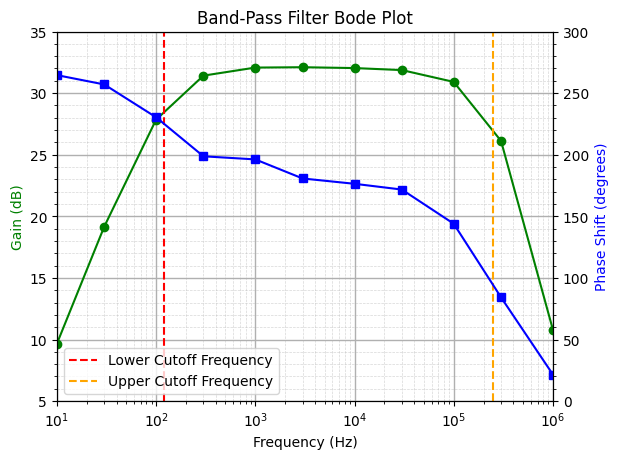

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Frequency sweep, load data from all CSV files
frequencies = [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
data = [pd.read_csv(f"scope_{i}.csv", skiprows=1).dropna() for i in range(len(frequencies))]
t = [data[i]["second"].to_numpy() for i in range(len(frequencies))]
v_in = [data[i]["Volt.1"].to_numpy() for i in range(len(frequencies))]
v_out = [data[i]["Volt"].to_numpy() for i in range(len(frequencies))]

# Use AC RMS values for gain calculation
v_in_dc = np.array([np.mean(v_in[i]) for i in range(len(frequencies))])
v_in_ac_rms = np.array([np.sqrt(np.mean((v_in[i] - v_in_dc[i])**2)) for i in range(len(frequencies))])
v_out_dc = np.array([np.mean(v_out[i]) for i in range(len(frequencies))])
v_out_ac_rms = np.array([np.sqrt(np.mean((v_out[i] - v_out_dc[i])**2)) for i in range(len(frequencies))])
gain = v_out_ac_rms / v_in_ac_rms
gain_db = 20 * np.log10(gain)

# Find the peaks for input and output signals to determine phase shift
t_max_v_in = np.array([t[i][np.argmax(v_in[i])] for i in range(len(frequencies))])
t_max_v_out = np.array([t[i][np.argmax(v_out[i])] for i in range(len(frequencies))])
phase_delay = t_max_v_out - t_max_v_in
phase_shift_deg = np.remainder(-phase_delay * 360 * np.array(frequencies), 360)

# Plot gain and phase shift on the same chart with dual y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(frequencies, gain_db, "g-o")
ax2.plot(frequencies, phase_shift_deg, "b-s")
ax1.set_xscale("log")
ax1.set_xlabel("Frequency (Hz)")
ax1.set_xlim(np.min(frequencies), np.max(frequencies))
ax1.set_ylim(5, 35)
ax2.set_ylim(0, 300)
ax1.set_ylabel("Gain (dB)", color="g")
ax2.set_ylabel("Phase Shift (degrees)", color="b")
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(which="major", linestyle="-", linewidth=1, alpha=1)
ax1.grid(which="minor", linestyle="--", linewidth=0.5, alpha=0.5)
ax1.set_title("Band-Pass Filter Bode Plot")
ax1.axvline(120, color="r", linestyle="--", label="Lower Cutoff Frequency")
ax1.axvline(250000, color="orange", linestyle="--", label="Upper Cutoff Frequency")
ax1.legend(loc="lower left")